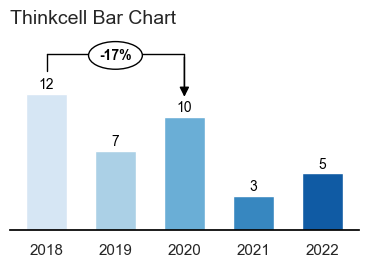

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as patches

def create_chart(categories, values, title_text, arrow_position, save_as=None):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.2, rc={"font.family": "Arial"})

    fig, ax = plt.subplots(figsize=(4.5, 2.5))
    bar_width = 0.6
    index = range(len(categories))
    bars = ax.bar(index, values, width=bar_width, color=sns.color_palette("Blues", len(values)))

    # Set the line underneath the bars to be black
    for spine in ax.spines.values():
        spine.set_edgecolor('black')

    ax.set_title(title_text, fontsize=14, loc='left', pad=10)
    ax.set_xticks(index)
    ax.set_xticklabels(categories, fontsize=11)
    ax.set_ylim(0, max(values) + 5)
    ax.set_yticks([])
    ax.yaxis.grid(False)
    ax.set_xlabel('')
    ax.grid(False)

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.2, int(yval), va='bottom', ha='center', fontsize=10, color='black')

    top = max(values) + 3.5
    # Update these lines
    lines = [[(0, values[0] + 2), (0, top)],
            [(0, top), (arrow_position, top)],
            [(arrow_position, top), (arrow_position, values[arrow_position] + 2)]]


    for line in lines:
        (x1, y1), (x2, y2) = line
        ax.add_line(Line2D([x1, x2], [y1, y2], color='black', lw=1, zorder=0))

    ax.annotate("", xy=(arrow_position, values[arrow_position] + 1.5), xytext=(arrow_position, top),
                arrowprops=dict(arrowstyle="-|>", color='black', lw=1))

    percentage_change = ((values[arrow_position] - values[0]) / values[0]) * 100
    
    # Update this line to dynamically set the position based on the length of categories
    box_position = (arrow_position) / 2

    # Dynamically set the size of the ellipse
    ellipse_width = 0.5 / len(categories) * 4
    ellipse_height = 1.5 / len(categories) * 4
    
    # Change the second parameter to set the vertical position of the text inside the box
    ax.text(box_position, top-0.1, f'{percentage_change:.0f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold', bbox=dict(boxstyle=f'ellipse,pad=0.2', fc='white', ec='black', lw=1))

    sns.despine(left=True)

    plt.show()

    if save_as:
        fig.savefig(save_as, bbox_inches='tight')

# Example usage
create_chart(
    ['2018', '2019', '2020', '2021', '2022'],
    [12, 7, 10, 3, 5],
    'Thinkcell Bar Chart',
    arrow_position=2,
    save_as='thinkcell_bar_chart.pdf'
)


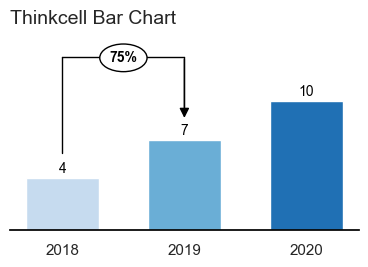

In [277]:
# Example usage
create_chart(
    ['2018', '2019', '2020'],
    [4, 7, 10],
    'Thinkcell Bar Chart',
    arrow_position=1,  # The bar at which the arrow should stop
    save_as='thinkcell_bar_chart_2.pdf'
)

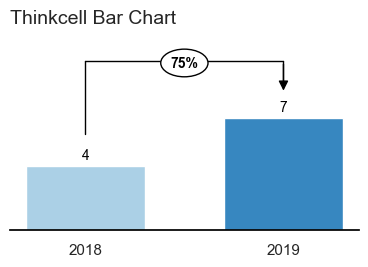

In [278]:
# Example usage
create_chart(
    ['2018', '2019'],
    [4, 7],
    'Thinkcell Bar Chart',
    arrow_position=1,  # The bar at which the arrow should stop
    save_as='thinkcell_bar_chart_2.pdf'
)